Select a method for initializing population:
1: ACM (Arnold's Cat Map)
2: BSM (Bernoulli Shift Map)
3: CM (Chebyshev Map)
4: Circle Map
5: Cubic Map


Enter the number of your choice:  1


ValueError: could not broadcast input array from shape (2,) into shape (5,)

Select a method for initializing population:
1: ACM (Arnold's Cat Map)
2: BSM (Bernoulli Shift Map)
3: CM (Chebyshev Map)
4: Circle Map
5: Cubic Map


Enter the number of your choice:  4


Best Solution: [8.77764053e-05 8.45350268e-05 5.03405086e-05 3.18285486e-05
 5.25420625e-05]
Best Fitness: 2.1158759733410118e-08


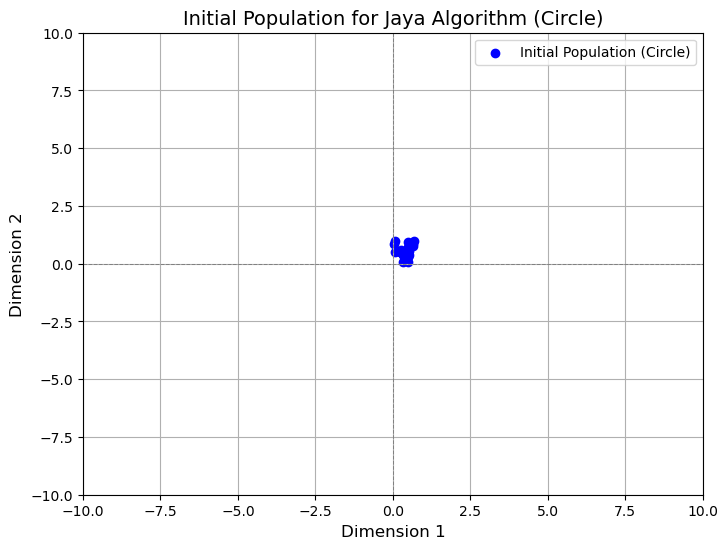

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def sphere_function(solution):
    return sum(x**2 for x in solution)

def arnolds_cat_map(population, dim):
    N = len(population)
    a, b = 1, 1  # Arnold's Cat Map parameters
    transformed = np.zeros_like(population)

    for i in range(N):
        x, y = int(population[i][0] % dim), int(population[i][1] % dim)
        x_new = (x + b * y) % dim
        y_new = (a * x + (a * b + 1) * y) % dim
        transformed[i] = [x_new, y_new]

    return transformed

def bernoulli_shift_map(population):
    return np.mod(2 * population, 1)

def chebyshev_map(population):
    return np.cos(np.arccos(np.clip(population, -1, 1)) * 2)

def circle_map(population, K=0.5):
    return np.mod(population + K - (1 / (2 * np.pi)) * np.sin(2 * np.pi * population), 1)

def cubic_map(population):
    return 4 * population * (1 - population)

def initialize_population(method, population_size, dim, bounds):
    population = np.random.uniform(bounds[0], bounds[1], (population_size, dim))

    if method == 'ACM':
        return arnolds_cat_map(population, dim)
    elif method == 'BSM':
        return bernoulli_shift_map(population)
    elif method == 'CM':
        return chebyshev_map(population)
    elif method == 'Circle':
        return circle_map(population)
    elif method == 'Cubic':
        return cubic_map(population)
    else:
        return population

def jaya_algorithm(fitness_func, dim, bounds, population_size, max_iterations, init_method):
    # Initialize population using the selected chaotic map method
    population = initialize_population(init_method, population_size, dim, bounds)

    for iteration in range(max_iterations):
        # Evaluate fitness for the current population
        fitness = np.array([fitness_func(ind) for ind in population])

        # Identify the best and worst solutions
        best_idx = np.argmin(fitness)
        worst_idx = np.argmax(fitness)

        best_solution = population[best_idx]
        worst_solution = population[worst_idx]

        # Update solutions
        for i in range(population_size):
            r1, r2 = np.random.rand(dim), np.random.rand(dim)

            # Jaya formula: move towards the best and away from the worst
            new_solution = (
                population[i]
                + r1 * (best_solution - abs(population[i]))
                - r2 * (worst_solution - abs(population[i]))
            )

            # Clip the solution to stay within bounds
            new_solution = np.clip(new_solution, bounds[0], bounds[1])

            # Replace if the new solution is better
            if fitness_func(new_solution) < fitness_func(population[i]):
                population[i] = new_solution

    # Return the best solution and its fitness value
    best_idx = np.argmin([fitness_func(ind) for ind in population])
    return population[best_idx], fitness_func(population[best_idx])

# Parameters
dim = 5  # Dimension of the problem
bounds = [-10, 10]  # Search space bounds
population_size = 20
max_iterations = 100

# User selects chaotic map method
print("Select a method for initializing population:")
print("1: ACM (Arnold's Cat Map)")
print("2: BSM (Bernoulli Shift Map)")
print("3: CM (Chebyshev Map)")
print("4: Circle Map")
print("5: Cubic Map")
method_choice = input("Enter the number of your choice: ")

methods = {
    "1": "ACM",
    "2": "BSM",
    "3": "CM",
    "4": "Circle",
    "5": "Cubic"
}
init_method = methods.get(method_choice, "ACM")

# Run Jaya algorithm
best_solution, best_fitness = jaya_algorithm(
    fitness_func=sphere_function,
    dim=dim,
    bounds=bounds,
    population_size=population_size,
    max_iterations=max_iterations,
    init_method=init_method
)

print("Best Solution:", best_solution)
print("Best Fitness:", best_fitness)

# Visualize the initialized population
dim = 2  # For visualization, reduce dimensions to 2
population = initialize_population(init_method, population_size, dim, bounds)

plt.figure(figsize=(8, 6))
plt.scatter(population[:, 0], population[:, 1], color='blue', label=f'Initial Population ({init_method})')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.7)
plt.xlim(bounds[0], bounds[1])
plt.ylim(bounds[0], bounds[1])
plt.title(f"Initial Population for Jaya Algorithm ({init_method})", fontsize=14)
plt.xlabel("Dimension 1", fontsize=12)
plt.ylabel("Dimension 2", fontsize=12)
plt.legend()
plt.grid()
plt.show()


Select a method for initializing population:
0: No Chaotic Map (Default Random Initialization)
1: BSM (Bernoulli Shift Map)
2: CM (Chebyshev Map)
3: Circle Map
4: Cubic Map


Enter the number of your choice:  1


Best Solution: [ 0.00012351 -0.00012596  0.00011263  0.00022123  0.00022276]
Best Fitness: 1.4237432675026803e-07


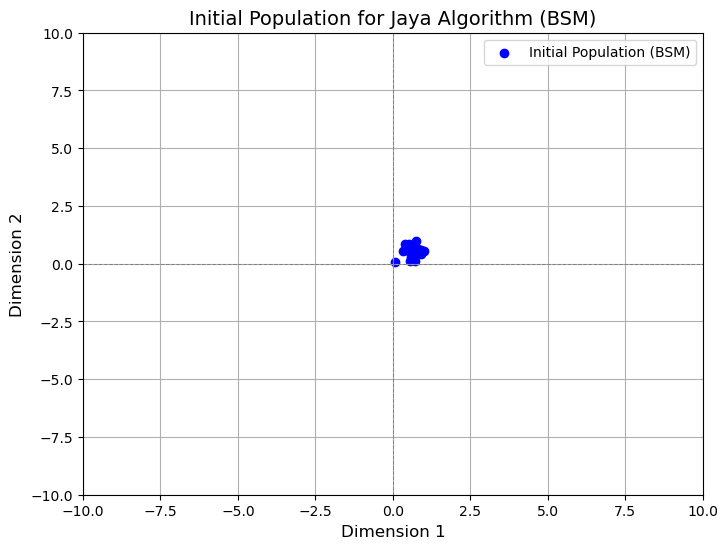

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def sphere_function(solution):
    return sum(x**2 for x in solution)

def bernoulli_shift_map(population):
    return np.mod(2 * population, 1)

def chebyshev_map(population):
    return np.cos(np.arccos(np.clip(population, -1, 1)) * 2)

def circle_map(population, K=0.5):
    return np.mod(population + K - (1 / (2 * np.pi)) * np.sin(2 * np.pi * population), 1)

def cubic_map(population):
    return 4 * population * (1 - population)

def initialize_population(method, population_size, dim, bounds):
    population = np.random.uniform(bounds[0], bounds[1], (population_size, dim))

    if method == 'BSM':
        return bernoulli_shift_map(population)
    elif method == 'CM':
        return chebyshev_map(population)
    elif method == 'Circle':
        return circle_map(population)
    elif method == 'Cubic':
        return cubic_map(population)
    else:
        return population

def jaya_algorithm(fitness_func, dim, bounds, population_size, max_iterations, init_method):
    # Initialize population using the selected chaotic map method
    population = initialize_population(init_method, population_size, dim, bounds)

    for iteration in range(max_iterations):
        # Evaluate fitness for the current population
        fitness = np.array([fitness_func(ind) for ind in population])

        # Identify the best and worst solutions
        best_idx = np.argmin(fitness)
        worst_idx = np.argmax(fitness)

        best_solution = population[best_idx]
        worst_solution = population[worst_idx]

        # Update solutions
        for i in range(population_size):
            r1, r2 = np.random.rand(dim), np.random.rand(dim)

            # Jaya formula: move towards the best and away from the worst
            new_solution = (
                population[i]
                + r1 * (best_solution - abs(population[i]))
                - r2 * (worst_solution - abs(population[i]))
            )

            # Clip the solution to stay within bounds
            new_solution = np.clip(new_solution, bounds[0], bounds[1])

            # Replace if the new solution is better
            if fitness_func(new_solution) < fitness_func(population[i]):
                population[i] = new_solution

    # Return the best solution and its fitness value
    best_idx = np.argmin([fitness_func(ind) for ind in population])
    return population[best_idx], fitness_func(population[best_idx])

# Parameters
dim = 5  # Dimension of the problem
bounds = [-10, 10]  # Search space bounds
population_size = 20
max_iterations = 100

# User selects chaotic map method
print("Select a method for initializing population:")
print("0: No Chaotic Map (Default Random Initialization)")
print("1: BSM (Bernoulli Shift Map)")
print("2: CM (Chebyshev Map)")
print("3: Circle Map")
print("4: Cubic Map")
method_choice = input("Enter the number of your choice: ")

methods = {
    "0": None,  # Default random initialization
    "1": "BSM",
    "2": "CM",
    "3": "Circle",
    "4": "Cubic"
}
init_method = methods.get(method_choice, None)

# Run Jaya algorithm
best_solution, best_fitness = jaya_algorithm(
    fitness_func=sphere_function,
    dim=dim,
    bounds=bounds,
    population_size=population_size,
    max_iterations=max_iterations,
    init_method=init_method
)

print("Best Solution:", best_solution)
print("Best Fitness:", best_fitness)

# Visualize the initialized population
dim = 2  # For visualization, reduce dimensions to 2
population = initialize_population(init_method, population_size, dim, bounds)

#plt.figure(figsize=(8, 6))
plt.scatter(population[:, 0], population[:, 1], color='blue', label=f'Initial Population ({init_method if init_method else "Default"})')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.7)
plt.xlim(bounds[0], bounds[1])
plt.ylim(bounds[0], bounds[1])
plt.title(f"Initial Population for Jaya Algorithm ({init_method if init_method else 'Default'})", fontsize=14)
plt.xlabel("Dimension 1", fontsize=12)
plt.ylabel("Dimension 2", fontsize=12)
plt.legend()
plt.grid()
plt.show()


Select a method for initializing population:
0: No Chaotic Map (Default Random Initialization)
1: BSM (Bernoulli Shift Map)
2: CM (Chebyshev Map)
3: Circle Map
4: Cubic Map


Enter the number of your choice:  4


Best Solution: [-0.00067455 -0.00168744  0.00043549 -0.00199635 -0.00195646]
Best Fitness: 1.1305251639119014e-05
Initialized Population:
[[  -8.39033619 -123.35267298]
 [-228.60540552 -326.34050445]
 [-298.34280714 -204.21054588]
 [-167.96384835  -10.06189861]
 [ -78.45470807 -259.89730048]
 [-110.79964619  -90.00947472]
 [-222.90056235 -318.46521665]
 [-337.09917384 -223.74925678]
 [-373.5108603  -220.69492289]
 [  -5.33067687 -216.10906832]
 [-236.9668185   -21.49567022]
 [-398.84987173 -221.94016777]
 [ -18.60346926 -165.16357983]
 [-191.88353574  -48.7686992 ]
 [ -40.92456467    0.63511423]
 [-143.61643242 -142.78134043]
 [-299.91830977 -155.67417985]
 [-350.16956685 -246.32446796]
 [  -4.26985437    0.94504587]
 [-265.58531956  -42.97579991]]


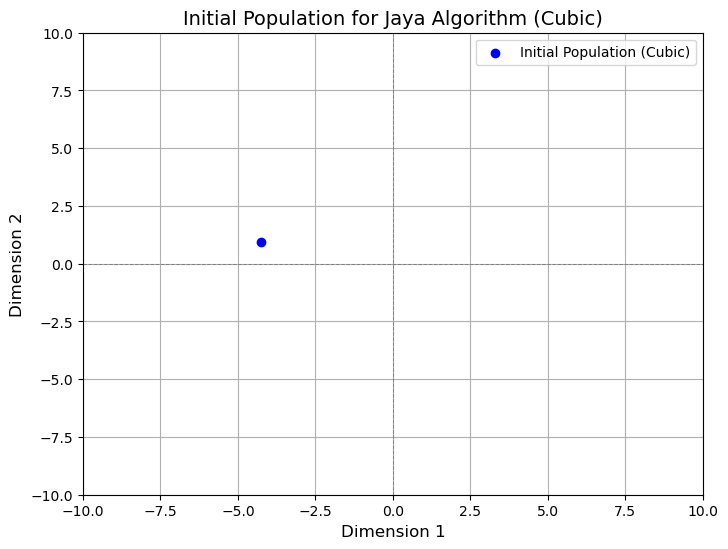

Select a method for initializing population:
0: No Chaotic Map (Default Random Initialization)
1: BSM (Bernoulli Shift Map)
2: CM (Chebyshev Map)
3: Circle Map
4: Cubic Map


Enter the number of your choice:  3


Best Solution: [-3.56276031e-06 -5.42663326e-07  1.58243610e-05 -3.21043444e-05
 -1.11423681e-05]
Best Fitness: 1.4182394420828609e-09


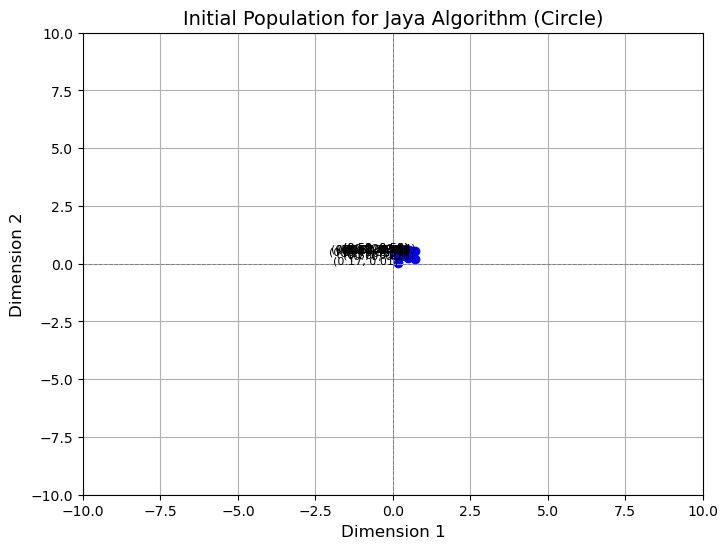

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def sphere_function(solution):
    return sum(x**2 for x in solution)

def bernoulli_shift_map(population):
    return np.mod(2 * population, 1)

def chebyshev_map(population):
    return np.cos(np.arccos(np.clip(population, -1, 1)) * 2)

def circle_map(population, K=0.5):
    return np.mod(population + K - (1 / (2 * np.pi)) * np.sin(2 * np.pi * population), 1)

def cubic_map(population):
    return 4 * population * (1 - population)

def initialize_population(method, population_size, dim, bounds):
    population = np.random.uniform(bounds[0], bounds[1], (population_size, dim))

    if method == 'BSM':
        return bernoulli_shift_map(population)
    elif method == 'CM':
        return chebyshev_map(population)
    elif method == 'Circle':
        return circle_map(population)
    elif method == 'Cubic':
        return cubic_map(population)
    else:
        return population

def jaya_algorithm(fitness_func, dim, bounds, population_size, max_iterations, init_method):
    # Initialize population using the selected chaotic map method
    population = initialize_population(init_method, population_size, dim, bounds)

    for iteration in range(max_iterations):
        # Evaluate fitness for the current population
        fitness = np.array([fitness_func(ind) for ind in population])

        # Identify the best and worst solutions
        best_idx = np.argmin(fitness)
        worst_idx = np.argmax(fitness)

        best_solution = population[best_idx]
        worst_solution = population[worst_idx]

        # Update solutions
        for i in range(population_size):
            r1, r2 = np.random.rand(dim), np.random.rand(dim)

            # Jaya formula: move towards the best and away from the worst
            new_solution = (
                population[i]
                + r1 * (best_solution - abs(population[i]))
                - r2 * (worst_solution - abs(population[i]))
            )

            # Clip the solution to stay within bounds
            new_solution = np.clip(new_solution, bounds[0], bounds[1])

            # Replace if the new solution is better
            if fitness_func(new_solution) < fitness_func(population[i]):
                population[i] = new_solution

    # Return the best solution and its fitness value
    best_idx = np.argmin([fitness_func(ind) for ind in population])
    return population[best_idx], fitness_func(population[best_idx])

# Parameters
dim = 5  # Dimension of the problem
bounds = [-10, 10]  # Search space bounds
population_size = 20
max_iterations = 100

# User selects chaotic map method
print("Select a method for initializing population:")
print("0: No Chaotic Map (Default Random Initialization)")
print("1: BSM (Bernoulli Shift Map)")
print("2: CM (Chebyshev Map)")
print("3: Circle Map")
print("4: Cubic Map")
method_choice = input("Enter the number of your choice: ")

methods = {
    "0": None,  # Default random initialization
    "1": "BSM",
    "2": "CM",
    "3": "Circle",
    "4": "Cubic"
}
init_method = methods.get(method_choice, None)

# Run Jaya algorithm
best_solution, best_fitness = jaya_algorithm(
    fitness_func=sphere_function,
    dim=dim,
    bounds=bounds,
    population_size=population_size,
    max_iterations=max_iterations,
    init_method=init_method
)

print("Best Solution:", best_solution)
print("Best Fitness:", best_fitness)

# Visualize the initialized population
dim = 2  # For visualization, reduce dimensions to 2
population = initialize_population(init_method, population_size, dim, bounds)

plt.figure(figsize=(8, 6))
for i, point in enumerate(population):
    plt.scatter(point[0], point[1], color='blue')
    plt.text(point[0], point[1], f"({point[0]:.2f}, {point[1]:.2f})", fontsize=8, ha='right')

plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.7)
plt.xlim(bounds[0], bounds[1])
plt.ylim(bounds[0], bounds[1])
plt.title(f"Initial Population for Jaya Algorithm ({init_method if init_method else 'Default'})", fontsize=14)
plt.xlabel("Dimension 1", fontsize=12)
plt.ylabel("Dimension 2", fontsize=12)
plt.grid()
plt.show()


Select a method for initializing population:
0: No Chaotic Map (Default Random Initialization)
1: BSM (Bernoulli Shift Map)
2: CM (Chebyshev Map)
3: Circle Map
4: Cubic Map


Enter the number of your choice:  2


Best Solution: [ 1.88744633e-04 -9.70225951e-05 -1.70298668e-04  2.59335199e-04
 -5.11722561e-04]
Best Fitness: 4.0315428135571125e-07
Initialized Population:
[[ 1.          1.        ]
 [ 1.          1.        ]
 [ 1.          0.60640592]
 [ 1.          1.        ]
 [ 1.          1.        ]
 [ 1.          1.        ]
 [ 1.         -0.56278557]
 [ 1.          1.        ]
 [ 1.          1.        ]
 [ 1.          1.        ]
 [ 1.          1.        ]
 [ 1.          1.        ]
 [ 1.          1.        ]
 [ 1.          1.        ]
 [ 1.          1.        ]
 [-0.97285741  1.        ]
 [ 1.         -0.75710091]
 [ 1.         -0.77259147]
 [ 1.          1.        ]
 [ 1.          0.56048701]]


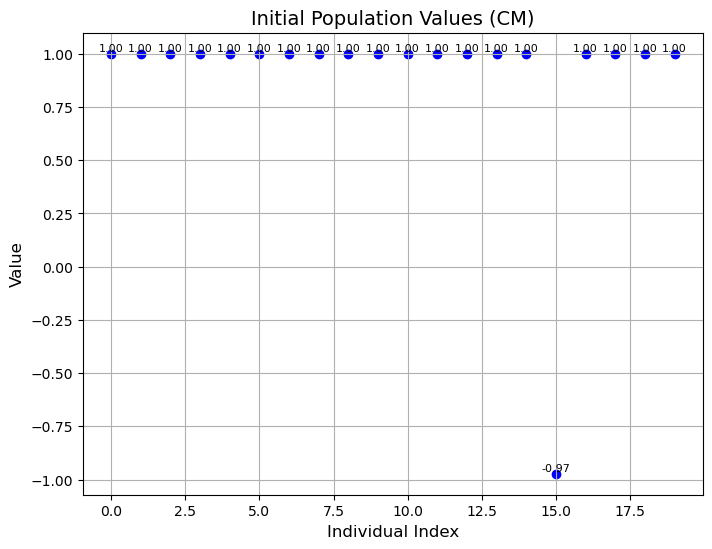

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def sphere_function(solution):
    return sum(x**2 for x in solution)

def bernoulli_shift_map(population):
    return np.mod(2 * population, 1)

def chebyshev_map(population):
    return np.cos(np.arccos(np.clip(population, -1, 1)) * 2)

def circle_map(population, K=0.5):
    return np.mod(population + K - (1 / (2 * np.pi)) * np.sin(2 * np.pi * population), 1)

def cubic_map(population):
    return 4 * population * (1 - population)

def initialize_population(method, population_size, dim, bounds):
    population = np.random.uniform(bounds[0], bounds[1], (population_size, dim))

    if method == 'BSM':
        return bernoulli_shift_map(population)
    elif method == 'CM':
        return chebyshev_map(population)
    elif method == 'Circle':
        return circle_map(population)
    elif method == 'Cubic':
        return cubic_map(population)
    else:
        return population

def jaya_algorithm(fitness_func, dim, bounds, population_size, max_iterations, init_method):
    # Initialize population using the selected chaotic map method
    population = initialize_population(init_method, population_size, dim, bounds)

    for iteration in range(max_iterations):
        # Evaluate fitness for the current population
        fitness = np.array([fitness_func(ind) for ind in population])

        # Identify the best and worst solutions
        best_idx = np.argmin(fitness)
        worst_idx = np.argmax(fitness)

        best_solution = population[best_idx]
        worst_solution = population[worst_idx]

        # Update solutions
        for i in range(population_size):
            r1, r2 = np.random.rand(dim), np.random.rand(dim)

            # Jaya formula: move towards the best and away from the worst
            new_solution = (
                population[i]
                + r1 * (best_solution - abs(population[i]))
                - r2 * (worst_solution - abs(population[i]))
            )

            # Clip the solution to stay within bounds
            new_solution = np.clip(new_solution, bounds[0], bounds[1])

            # Replace if the new solution is better
            if fitness_func(new_solution) < fitness_func(population[i]):
                population[i] = new_solution

    # Return the best solution and its fitness value
    best_idx = np.argmin([fitness_func(ind) for ind in population])
    return population[best_idx], fitness_func(population[best_idx])

# Parameters
dim = 5  # Dimension of the problem
bounds = [-10, 10]  # Search space bounds
population_size = 20
max_iterations = 100

# User selects chaotic map method
print("Select a method for initializing population:")
print("0: No Chaotic Map (Default Random Initialization)")
print("1: BSM (Bernoulli Shift Map)")
print("2: CM (Chebyshev Map)")
print("3: Circle Map")
print("4: Cubic Map")
method_choice = input("Enter the number of your choice: ")

methods = {
    "0": None,  # Default random initialization
    "1": "BSM",
    "2": "CM",
    "3": "Circle",
    "4": "Cubic"
}
init_method = methods.get(method_choice, None)

# Run Jaya algorithm
best_solution, best_fitness = jaya_algorithm(
    fitness_func=sphere_function,
    dim=dim,
    bounds=bounds,
    population_size=population_size,
    max_iterations=max_iterations,
    init_method=init_method
)

print("Best Solution:", best_solution)
print("Best Fitness:", best_fitness)

# Visualize the initialized population
dim = 2  # For visualization, reduce dimensions to 2
population = initialize_population(init_method, population_size, dim, bounds)

print("Initialized Population:")
print(population)

plt.figure(figsize=(8, 6))
for i in range(population.shape[0]):
    plt.scatter(i, population[i][0], color='blue')
    plt.text(i, population[i][0], f"{population[i][0]:.2f}", fontsize=8, ha='center', va='bottom')

plt.title(f"Initial Population Values ({init_method if init_method else 'Default'})", fontsize=14)
plt.xlabel("Individual Index", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.grid()
plt.show()


Select a method for initializing population:
0: No Chaotic Map (Default Random Initialization)
1: BSM (Bernoulli Shift Map)
2: CM (Chebyshev Map)
3: Circle Map
4: Cubic Map


Enter the number of your choice:  2


Best Solution: [ 1.00000000e+00 -2.61075841e-06 -4.17972682e-07  1.59055551e-06
  1.00000000e+00]
Best Fitness: 2.000000000009521
Initialized Population:
[[ 1.          1.        ]
 [ 1.          1.        ]
 [-0.99568832  1.        ]
 [-0.52539983  1.        ]
 [ 1.          1.        ]
 [ 1.          1.        ]
 [ 1.          1.        ]
 [ 1.          1.        ]
 [ 1.          1.        ]
 [ 1.          1.        ]
 [-0.94028955  1.        ]
 [ 1.          1.        ]
 [ 1.          1.        ]
 [ 1.          1.        ]
 [ 1.          1.        ]
 [ 1.          1.        ]
 [ 1.          1.        ]
 [ 1.          1.        ]
 [ 1.          1.        ]
 [ 1.          1.        ]]


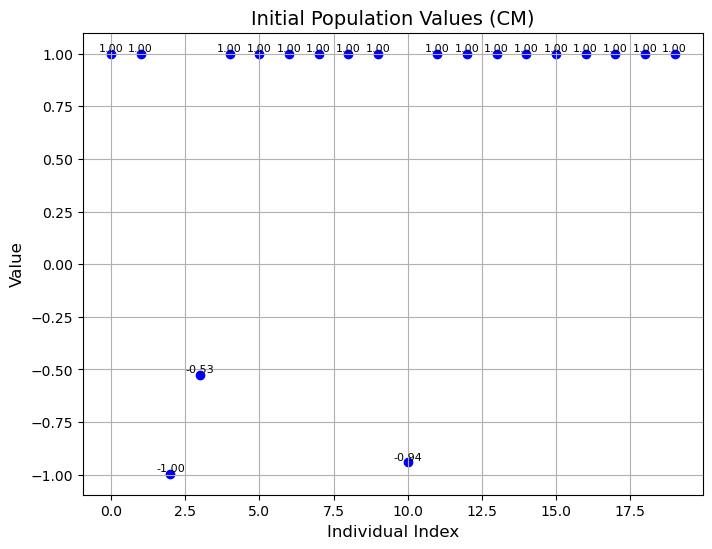

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def sphere_function(solution):
    return sum(x**2 for x in solution)

def bernoulli_shift_map(population):
    return np.mod(2 * population, 1)

def chebyshev_map(population):
    return np.cos(np.arccos(np.clip(population, -1, 1)) * 2)

def circle_map(population, K=0.5):
    return np.mod(population + K - (1 / (2 * np.pi)) * np.sin(2 * np.pi * population), 1)

def cubic_map(population):
    return 4 * population * (1 - population)

def initialize_population(method, population_size, dim, bounds):
    population = np.random.uniform(bounds[0], bounds[1], (population_size, dim))

    if method == 'BSM':
        return bernoulli_shift_map(population)
    elif method == 'CM':
        return chebyshev_map(population)
    elif method == 'Circle':
        return circle_map(population)
    elif method == 'Cubic':
        return cubic_map(population)
    else:
        return population

def jaya_algorithm(fitness_func, dim, bounds, population_size, max_iterations, init_method):
    # Initialize population using the selected chaotic map method
    population = initialize_population(init_method, population_size, dim, bounds)

    for iteration in range(max_iterations):
        # Evaluate fitness for the current population
        fitness = np.array([fitness_func(ind) for ind in population])

        # Identify the best and worst solutions
        best_idx = np.argmin(fitness)
        worst_idx = np.argmax(fitness)

        best_solution = population[best_idx]
        worst_solution = population[worst_idx]

        # Update solutions
        for i in range(population_size):
            r1, r2 = np.random.rand(dim), np.random.rand(dim)

            # Jaya formula: move towards the best and away from the worst
            new_solution = (
                population[i]
                + r1 * (best_solution - abs(population[i]))
                - r2 * (worst_solution - abs(population[i]))
            )

            # Clip the solution to stay within bounds
            new_solution = np.clip(new_solution, bounds[0], bounds[1])

            # Replace if the new solution is better
            if fitness_func(new_solution) < fitness_func(population[i]):
                population[i] = new_solution

    # Return the best solution and its fitness value
    best_idx = np.argmin([fitness_func(ind) for ind in population])
    return population[best_idx], fitness_func(population[best_idx])

# Parameters
dim = 5  # Dimension of the problem
bounds = [-10, 10]  # Search space bounds
population_size = 20
max_iterations = 100

# User selects chaotic map method
print("Select a method for initializing population:")
print("0: No Chaotic Map (Default Random Initialization)")
print("1: BSM (Bernoulli Shift Map)")
print("2: CM (Chebyshev Map)")
print("3: Circle Map")
print("4: Cubic Map")
method_choice = input("Enter the number of your choice: ")

methods = {
    "0": None,  # Default random initialization
    "1": "BSM",
    "2": "CM",
    "3": "Circle",
    "4": "Cubic"
}
init_method = methods.get(method_choice, None)

# Run Jaya algorithm
best_solution, best_fitness = jaya_algorithm(
    fitness_func=sphere_function,
    dim=dim,
    bounds=bounds,
    population_size=population_size,
    max_iterations=max_iterations,
    init_method=init_method
)

print("Best Solution:", best_solution)
print("Best Fitness:", best_fitness)

# Visualize the initialized population
dim = 2  # For visualization, reduce dimensions to 2
population = initialize_population(init_method, population_size, dim, bounds)



print("Initialized Population:")
print(population)

plt.figure(figsize=(8, 6))
for i in range(population.shape[0]):
    plt.scatter(i, population[i][0], color='blue')
    plt.text(i, population[i][0], f"{population[i][0]:.2f}", fontsize=8, ha='center', va='bottom')

plt.title(f"Initial Population Values ({init_method if init_method else 'Default'})", fontsize=14)
plt.xlabel("Individual Index", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.grid()
plt.show()